In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
pd.set_option('display.max_columns', None)
ac = pd.read_csv('result_filtered.csv')

In [3]:
#ac = ac.drop(columns=['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude'])

In [4]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,20:20,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,11:50,5,6,30,3,4,1,1,9,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,19:31,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,19:13,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
4,534946.0,184874.0,-0.055243,51.546633,1,1,11,2,18:03,6,6,20,3,2,4,8,2,0,0,1,2,3,1,42,7,2,0,0,1,2,11,0,7,0,2,0,0,0,0,4,1,1,8,6700,2,2,3,1


In [5]:
ac['casualty_severity'].describe()

count    76066.000000
mean         2.790603
std          0.439290
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: casualty_severity, dtype: float64

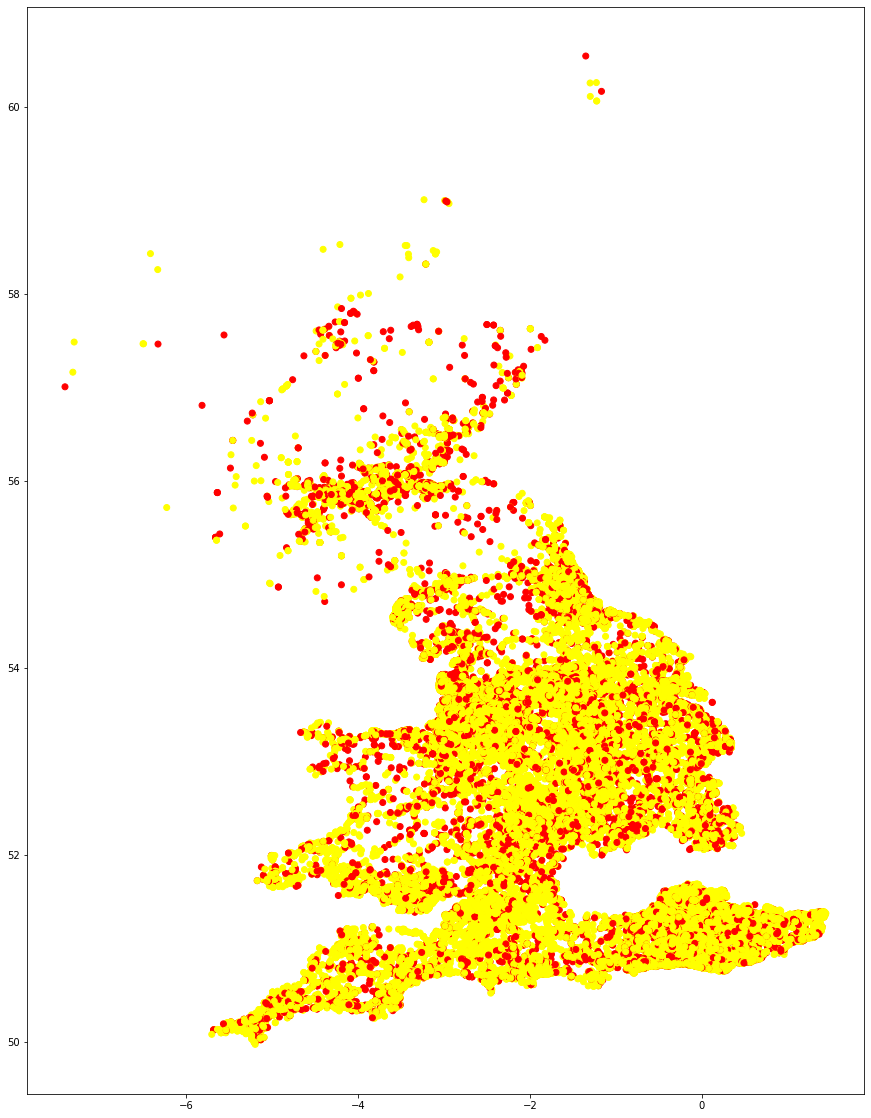

In [6]:
#Plot accidents
colors = ["red" if i<=2 else 'yellow' for i in ac['casualty_severity']]
plt.figure(figsize=(15,20))
plt.scatter(ac['longitude'], ac['latitude'], color = colors) #['latitude'], color = colors)

In [7]:
times = ac['time'].str.split(':')
minute = np.zeros(len(times))
count = 0
for t in times:
    t = int(t[0]) * 60 + int(t[1])
    minute[count] = t
    count += 1
ac['time'] = minute

In [8]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,9,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
4,534946.0,184874.0,-0.055243,51.546633,1,1,11,2,1083.0,6,6,20,3,2,4,8,2,0,0,1,2,3,1,42,7,2,0,0,1,2,11,0,7,0,2,0,0,0,0,4,1,1,8,6700,2,2,3,1


In [9]:
ac = ac.rename(columns={"date": "month"})

In [10]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,9,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
4,534946.0,184874.0,-0.055243,51.546633,1,1,11,2,1083.0,6,6,20,3,2,4,8,2,0,0,1,2,3,1,42,7,2,0,0,1,2,11,0,7,0,2,0,0,0,0,4,1,1,8,6700,2,2,3,1


In [11]:
ac.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,76049.000000,7.604900e+04,76049.000000,76049.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000
mean,424135.180213,3.020326e+05,-1.653949,52.608164,1.910762,1.671391,6.791457,4.123209,856.314871,4.218560,5.264178,38.726395,2.538125,1.504470,2.116254,1.671364,1.374175,0.137394,0.091473,1.400021,1.684682,1.452699,1.377659,36.929325,6.337667,2.790603,0.233850,7.659730,1.085754,4.263403,9.130492,0.056859,15.461941,1.788145,2.278074,0.511227,2.160361,0.739371,2.413956,1.834223,4.738293,1.361752,6.491941,1237.755331,0.922370,6.212421,4.351629,1.110904
std,89799.895780,1.495816e+05,1.307339,1.348514,0.753181,1.171778,3.687687,1.951968,301.274958,1.477167,1.574765,14.332981,6.354184,2.403105,1.779552,1.758079,0.683854,0.896153,0.719337,0.490361,0.832348,0.709629,0.498996,19.437101,2.411949,0.439290,0.571046,10.021081,0.952025,3.248863,10.617689,0.680547,12.308299,12.478917,3.126421,1.531341,12.674309,2.024123,12.555289,1.305770,1.827862,0.535405,2.404212,1245.581439,1.431182,6.532552,3.234095,0.941086
min,71500.000000,1.271500e+04,-7.412812,49.970479,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,366492.000000,1.698960e+05,-2.497367,51.411539,1.000000,1.000000,3.000000,2.000000,655.000000,3.000000,6.000000,30.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,1.000000,1.000000,2.000000,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,5.000000,49.000000,1.000000,0.000000,2.000000,1.000000
50%,423168.000000,2.976910e+05,-1.649583,52.575191,2.000000,1.000000,7.000000,4.000000,895.000000,4.000000,6.000000,30.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,9.000000,1.000000,4.000000,9.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,7.000000,1339.000000,1.000000,5.000000,4.000000,1.000000
75%,494783.000000,4.049420e+05,-0.609661,53.538389,2.000000,2.000000,10.000000,6.000000,1075.000000,6.000000,6.000000,50.000000,3.000000,4.000000,4.000000,1.000000,2.000000,0.000000,0.0000

In [12]:
#Set first_road_class from uclassified (6) to missing (-1)
ac['first_road_class'] = ac['first_road_class'].replace(6, -1)

In [13]:
##One Hot Encode Feature Road_class -> Motorway,A(M),A,B,C,Unclassified
# Road_Type: 9=Unknown, -1=DataMissing together as one value
#ac[ac['road_type'] == 9] = -1
ac['road_type'] = ac['road_type'].replace(9, -1)

In [14]:
#Set unknown Speed Limits (99) to 0
#ac[ac['speed_limit'] == 99] = -1
ac['speed_limit'] = ac['speed_limit'].replace(99, -1)

In [15]:
#Set unknown junction details (9,99, -1) to -1
#ac[ac['junction_detail'] == 9] = -1
#ac[ac['junction_detail'] == 99] = -1
ac['junction_detail'] = ac['junction_detail'].replace([9, 99], -1)

In [16]:
#Set missing junction details (9) to -1 (unknown)
#ac[ac['junction_control'] == 9] = -1
ac['junction_control'] = ac['junction_control'].replace(9, -1)

## Weather Conditions
### - maybe divide into two categories (fine, reain, snow) and (wind)

In [17]:
#Set light conditions other (8) and unknown(9) to -1 (missing)
#ac[ac['weather_conditions'] == 8] = -1
#ac[ac['weather_conditions'] == 9] = -1
ac['weather_conditions'] = ac['weather_conditions'].replace([8, 9], -1)

In [18]:
#road_surface_conditions unknown (9) to -1 (missing)
#ac[ac['road_surface_conditions'] == 9] = -1
ac['road_surface_conditions'] = ac['road_surface_conditions'].replace(9, -1)

In [19]:
#special_conditions_at_site set unknown (9) to -1
##ac[ac['special_conditions_at_site'] == 9] = -1
ac['special_conditions_at_site'] = ac['special_conditions_at_site'].replace(9, -1)

In [20]:
#carriageway_hazards set unknown (9) to missing
#ac[ac['carriageway_hazards'] == 9] = -1
ac['carriageway_hazards'] = ac['carriageway_hazards'].replace(9, -1)

#set all animals on road (dog = 4, other = 5 , any = 7) to 10 (animal)
#ac[ac['carriageway_hazards'] == 4] = 10
#ac[ac['carriageway_hazards'] == 5] = 10
#ac[ac['carriageway_hazards'] == 7] = 10
ac['carriageway_hazards'] = ac['carriageway_hazards'].replace([4, 5, 7], 10)

In [21]:
#Casualty Class: remove all rows where this is a pedestrian (3)
ac = ac[ac.casualty_class != 3]
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,21,5,3,0,3,1,7,3,0,99,99,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [22]:
ac[ac['casualty_class'] == 3]

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type


In [23]:
#sex_of_casualty set unknown (9) to -1 (missing)
#ac[ac['sex_of_casualty'] == 9] = -1
ac['sex_of_casualty'] = ac['sex_of_casualty'].replace(9, -1)

In [24]:
ac[ac.sex_of_casualty == -1]

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
17,527346.0,182646.0,-0.165591,51.528376,4,2,11,2,888.0,3,3,30,3,2,1,1,1,0,0,1,2,1,-1,-1,-1,3,0,1,-1,-1,1,9,99,99,9,9,99,9,99,1,6,3,-1,-1,-1,-1,-1,-1
64,533885.0,190448.0,-0.068415,51.596975,2,2,11,3,1018.0,-1,-1,20,3,2,7,1,1,0,0,1,2,2,-1,-1,-1,3,1,9,1,2,9,0,99,99,9,9,99,9,99,9,6,1,4,1598,2,1,2,1
279,532503.0,177303.0,-0.093298,51.479174,2,1,11,6,765.0,-1,6,20,0,-1,1,1,1,0,0,1,2,1,-1,38,7,3,0,1,1,3,1,9,99,99,0,9,99,9,99,9,2,3,7,-1,-1,-1,3,1
316,534959.0,184810.0,-0.055080,51.546055,2,3,11,6,751.0,3,6,20,3,2,1,1,1,0,0,1,2,2,-1,0,1,3,2,9,1,1,9,0,99,99,9,9,99,9,99,9,6,1,5,1596,1,7,1,1
317,534959.0,184810.0,-0.055080,51.546055,2,3,11,6,751.0,3,6,20,3,2,1,1,1,0,0,1,2,2,-1,-1,-1,3,2,9,1,1,9,0,99,99,9,9,99,9,99,9,6,1,5,1596,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57443,588097.0,118152.0,0.675482,50.932139,2,1,4,3,1070.0,-1,6,30,0,-1,1,1,1,0,0,2,2,1,-1,-1,-1,3,0,1,3,3,1,0,17,0,0,0,0,0,0,1,6,3,-1,-1,-1,-1,3,3
58425,507472.0,103006.0,-0.475754,50.816631,3,1,8,4,820.0,4,6,30,3,4,1,1,1,0,0,1,2,1,-1,-1,-1,3,0,1,-1,-1,1,0,4,0,1,0,0,0,0,3,6,3,-1,-1,-1,-1,-1,-1
59518,533404.0,123520.0,-0.100345,50.995617,2,1,10,2,895.0,3,1,30,1,4,1,1,1,0,0,1,2,1,-1,18,4,3,0,3,3,9,3,0,18,0,8,0,0,0,0,1,6,3,4,125,1,3,9,3
61288,255026.0,115528.0,-4.063974,50.920941,2,1,2,4,611.0,3,6,60,0,-1,1,1,1,0,0,2,2,1,-1,30,6,3,0,9,1,8,9,0,15,0,0,0,0,0,0,4,1,3,6,-1,-1,-1,8,1


In [25]:
#We remove age_of_casualty:
ac = ac.drop(columns=['age_of_casualty'])
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,3,1,7,3,0,99,99,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [26]:
#Car Passenger set Unknown (9) to (-1) missing
ac['car_passenger'] = ac['car_passenger'].replace(9, -1)

In [27]:
#casualty_type
#Remove Cyclists -> those where 10,000 of whom about 100 died
ac = ac[ac.casualty_type != 1]

#Remove Mobility Scooter Riders
ac = ac[ac.casualty_type != 22]

#Remove 80 Horse Riders
ac = ac[ac.casualty_type != 16]

#All Motorcycles into one class (120)
ac['casualty_type'] = ac['casualty_type'].replace([2, 3, 4, 5, 23, 97], 120)

#All cars into one class (130)
ac['casualty_type'] = ac['casualty_type'].replace([8, 9, 19], 130)

#All Transporters into one class (140)
ac['casualty_type'] = ac['casualty_type'].replace([17, 20, 21, 98], 140)

#All Busses/Trams into one class (150)
ac['casualty_type'] = ac['casualty_type'].replace([10, 11, 18], 150)

#Others (90) and Unknowns (97) to missing (-1)
ac['casualty_type'] = ac['casualty_type'].replace([90, 97], -1)

#TOBI: Plotte die Verteilungen von Autos und zugehörigen Toten

In [28]:
#Remove Vehicle_type as this is the same as Casualty_type
ac = ac.drop(columns=['vehicle_type'])

In [29]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,99,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [30]:
#towing_and_articulation
#Remove all missing rows, as no one of them died
ac = ac[ac.towing_and_articulation != -1]

In [31]:
#All with tows into one class (6)
ac['towing_and_articulation'] = ac['towing_and_articulation'].replace([1, 2, 3, 4], 6)

#Set Unknkown (9) to missing (-1)
ac['towing_and_articulation'] = ac['towing_and_articulation'].replace(9, -1)

#b = ac[ac.towing_and_articulation==-1]
#b[b['casualty_severity'] == 1]

In [32]:
# vehicle_manoeuvre
# All not moving cars into one class (50)
ac['vehicle_manoeuvre'] = ac['vehicle_manoeuvre'].replace([2, 3, 8, 10], 50)

for i in range(101):
    b = ac[ac['vehicle_manoeuvre'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
1  :  0.014925373134328358
4  :  0.002515371716042482
5  :  0.004186602870813397
6  :  0.009836065573770493
7  :  0.0031007751937984496
9  :  0.007396072430502423
11  :  0.009708737864077669
12  :  0.005076142131979695
13  :  0.025041736227045076
14  :  0.0024096385542168677
15  :  0.01090909090909091
16  :  0.029133029133029134
17  :  0.021870503597122302
18  :  0.013969106783075889
50  :  0.001911049339819319
99  :  0.0023228803716608595


In [33]:
#vehicle_location_restricted_lane
#Set unknown (99) to missing (-1)
ac['vehicle_location_restricted_lane'] = ac['vehicle_location_restricted_lane'].replace(99, -1)
for i in range(101):
    b = ac[ac['vehicle_location_restricted_lane'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0011507479861910242
0  :  0.012128440366972477
1  :  0.0
2  :  0.006060606060606061
3  :  0.0
4  :  0.0
5  :  0.0
6  :  0.040697674418604654
7  :  0.08108108108108109
8  :  0.0
9  :  0.02127659574468085


In [34]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [35]:
#junction_location

#Set unknown (9) to missing (-1)
ac['junction_location'] = ac['junction_location'].replace(9, -1)

In [36]:
#skidding_and_overturning
#Set unknown (9) to missing (-1)
ac['skidding_and_overturning'] = ac['skidding_and_overturning'].replace(9, -1)

In [37]:
#hit_object_in_carriageway
# #Set unknown (99) to missing (-1)
ac['hit_object_in_carriageway'] = ac['hit_object_in_carriageway'].replace(99, -1)

for i in range(101):
    b = ac[ac['hit_object_in_carriageway'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
0  :  0.011812731718860929
1  :  0.0
2  :  0.03076923076923077
4  :  0.010901162790697675
5  :  0.0
6  :  0.03773584905660377
7  :  0.015698587127158554
8  :  0.05555555555555555
9  :  0.024096385542168676
10  :  0.025252525252525252
11  :  0.004889975550122249
12  :  0.0


In [38]:
#vehicle_leaving_carriageway
#Set unknown (9) to missing (-1)
ac['vehicle_leaving_carriageway'] = ac['vehicle_leaving_carriageway'].replace(9, -1)

In [39]:
#hit_object_off_carriageway
#Set unknown (99) to missing (-1)
ac['hit_object_off_carriageway'] = ac['hit_object_off_carriageway'].replace(99, -1)

for i in range(101):
    b = ac[ac['hit_object_off_carriageway'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
0  :  0.008834719803959503
1  :  0.01616915422885572
2  :  0.024456521739130436
3  :  0.011450381679389313
4  :  0.055131004366812224
5  :  0.08571428571428572
6  :  0.020964360587002098
7  :  0.027777777777777776
8  :  0.3
9  :  0.020070838252656435
10  :  0.022816166883963495
11  :  0.02798708288482239


In [40]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,9,6,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,6,2,5,125,1,6,7,1


In [41]:
#first_point_of_impact
#Set unknown (9) to missing (-1)
ac['first_point_of_impact'] = ac['first_point_of_impact'].replace(9, -1)

In [42]:
#journey_purpose_of_driver
for i in range(101):
    b = ac[ac['journey_purpose_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

#Statistic shows that this is not necessary, so we drop it
ac = ac.drop(columns='journey_purpose_of_driver')

1  :  0.006168411992540525
2  :  0.005860048259220959
3  :  0.0013297872340425532
4  :  0.0
5  :  0.009549689440993788
6  :  0.0161436482631314


In [43]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,-1,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,1,7,124,1,7,6,1
5,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,2,5,125,1,6,7,1


In [44]:
#sex_of_driver
#Set unknown (3) to missing (-1)
ac['sex_of_driver'] = ac['sex_of_driver'].replace(3, -1)
for i in range(101):
    b = ac[ac['sex_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0053475935828877
1  :  0.015106474975678305
2  :  0.0063865723635595905


In [45]:
for i in range(101):
    b = ac[ac['age_band_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0021436227224008574
1  :  0.0
2  :  0.0
3  :  0.0
4  :  0.009220755740372446
5  :  0.012291723572794318
6  :  0.01013317892298784
7  :  0.011199348401547547
8  :  0.011298105213604802
9  :  0.014241932576167298
10  :  0.019628836545324768
11  :  0.03064935064935065


In [46]:
#age_of_vehicle
for i in range(101):
    b = ac[ac['age_of_vehicle'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.01270772238514174
0  :  0.006119951040391677
1  :  0.008420441347270616
2  :  0.010540184453227932
3  :  0.008516213560432362
4  :  0.007830626450116009
5  :  0.009337349397590362
6  :  0.011494252873563218
7  :  0.009052924791086351
8  :  0.010542168674698794
9  :  0.009410801963993453
10  :  0.01225114854517611
11  :  0.01036682615629984
12  :  0.012118986412045538
13  :  0.013471502590673576
14  :  0.014250814332247556
15  :  0.0107421875
16  :  0.017467248908296942
17  :  0.018575851393188854
18  :  0.036852589641434265
19  :  0.019197207678883072
20  :  0.02631578947368421
21  :  0.03663003663003663
22  :  0.01764705882352941
23  :  0.04065040650406504
24  :  0.022988505747126436
25  :  0.02040816326530612
26  :  0.06521739130434782
27  :  0.05555555555555555
28  :  0.10638297872340426
29  :  0.034482758620689655
30  :  0.038461538461538464
31  :  0.03125
32  :  0.0
33  :  0.25
34  :  0.0
35  :  0.0
36  :  0.2222222222222222
37  :  0.0
38  :  0.0
39  :  0.0
40  :  0.0
41 

In [47]:
ac.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,1,5,113,1,4,-1,-1
1,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,-1,1,4,125,1,4,1,1
2,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,7,125,1,0,3,1
3,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,1,7,124,1,7,6,1
5,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,2,5,125,1,6,7,1


In [48]:
ac.to_csv('accidents_preprocessed.csv', index=False)